In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in data
songs = pd.read_csv('DropMix Card List.csv', encoding='latin-1')
songs.head()

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
0,The Transformers,Main Title Song,2,Wild,V/K/D/K,"Soundtrack, Dance/Electronic",P01,C001,9/1/17,DM,Promo,85,D Minor,Shawn Kenney,NaN
1,Bruno Mars,24K Magic,2,Wild,V/K/D/K,"Pop, R&B",S01,C001,9/24/17,Sweets,Gaming System,107,F Minor,Dan Stiles,NaN
2,Carly Rae Jepsen,Call Me Maybe,2,Lead,Vocals,Pop,S01,C002,9/24/17,Sweets,Gaming System,120,G Major,Sander Berg,NaN
3,Sia,Chandelier,3,Lead,Vocals,Pop,S01,C003,9/24/17,Sweets,Gaming System,87,Db Major,Lisk Feng,NaN
4,Ricky Martin,La Mordidita (Ft. Yotuel),1,Loop,Horns,"Latin, Pop",S01,C004,9/24/17,Sweets,Gaming System,142,E Minor,Gianna Ruggiero,NaN


In [12]:
songs.tail(8) #showing all the baffler cards

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
301,Ludwig Van Beethoven,5th Symphony,3,Lead,Strings,Classical,S01,C301,9/24/17,Baffler,Playlist Pack,96,C Minor,Leslie Herman,NaN
302,Harmonix Music,Doctor Who Theme,3,Lead,Keys,Soundtrack,S01,C302,9/24/17,Baffler,Playlist Pack,139,E Minor,DKNG Studios LLC,NaN
303,Harmonix Music,Baker Street,3,Lead,Horns,?,S01,C303,2018,Baffler,Playlist Pack,?,?,Shawn Witt,NaN
304,LEN,Steal My Sunshine,3,Lead,Vocals,"Rock, Hip-Hop/Rap",S01,C304,9/24/17,Baffler,Playlist Pack,96,E Major,Justin Froning,NaN
305,Connecticut River Boys,Didgeridoo Stomp,3,Loop,Sampler,Country,S01,C305,2/1/18,Baffler,Playlist Pack,120,Bb Major,Anne Szabla,NaN
306,Harmonix Music,Wipe Out,3,Loop,Guitar,Rock,S01,C306,11/30/17,Baffler,Playlist Pack,150,B Major,Lauren Saint Onge,NaN
307,Davis Franklin,Beat Boxer,3,Beat,Vocals,Hip-Hop/Rap,S01,C307,9/24/17,Baffler,Playlist Pack,130,n/a,Jeff Lowry,NaN
308,J.S. Bach,Cello Suite No. 1 in G Major,3,Bass,Strings,Classical,S01,C308,12/4/17,Baffler,Playlist Pack,100,G Major,Anne Szabla,NaN


In [3]:
songs.dtypes

Artist         object
Title          object
Lvl             int64
Type           object
Instrument     object
Style          object
Season         object
Card #         object
Release        object
Playlist       object
Source         object
BPM            object
Key            object
Illustrator    object
Effect         object
dtype: object

In [4]:
songs.describe()

,Lvl
count,309.000000
mean,2.045307
std,0.758856
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


Only Lvl is an integer right now (we'll fix this as needed), so it's the only column that can be described, but that's enough to check that the number of rows is correct. 

There are 309 cards in this dataset.

In [5]:
# number of cards per source (also list of sources)
source_counts = songs['Source'].value_counts()
print(source_counts)

Playlist Pack    128
Discover Pack    120
Gaming System     60
Promo              1
Name: Source, dtype: int64


In [9]:
# number of cards per deck (also list of decks)
playlist_counts = songs['Playlist'].value_counts()
print(playlist_counts)

Moonlight     15
Mirrors       15
Astro         15
Dapper        15
Sweets        15
Ouroboros     15
Controller    15
Breaker       15
Seer          15
Socket        15
Puff          15
Flawless      15
Derby         15
Fever         15
Hightower     15
Chiller       15
Blade         15
Bomb          15
Lucky         15
Highness      15
Baffler        8
DM             1
Name: Playlist, dtype: int64


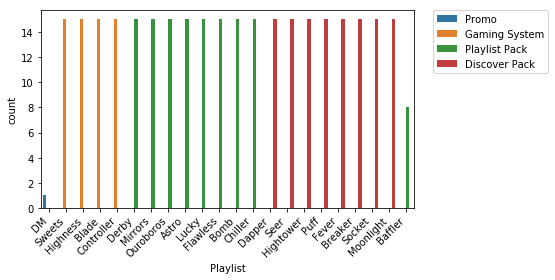

In [7]:
%matplotlib inline

# plot bar graph of playlist by source (bars will basically all be the same height, but shows decks per source)
ax = sns.countplot(x='Playlist', hue='Source', data=songs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

60 cards come with the base system (where the source is "Gaming System"), in the decks (playlists) Sweets, Highness, Blade, and Controller (15 cards per deck). The playlist pack contain 16 cards and contain an entire deck plus one hidden bonus card from the Baffler deck. There are 8 playlist packs out so far - Derby, Mirrors, Ouroboros, Astro, Lucky, Flawless, Bomb, and Chiller - for a total of 128 cards (the 8 Baffler cards are included in this number). The discover packs contain 5 cards per pack (not randomly, the cards are set), but the decks are spread across the packs. The 24 current discover packs (for 120 total cards in the discover packs) make up 8 additional decks - Dapper, Seer, Hightower, Puff, Fever, Breaker, Socket, and Moonlight. They came in 4 series, with 6 packs per series and 4 decks spread across series 1 and 2 and the last 4 decks spread across the 3rd and 4th series. There was then one additional promo card that was released as a bonus with the purchase of DropMix products from GameStop. (In case you were curious, this promo card is extremely difficult to obtain as it was gone within the first day or two after being available.) Total cards: 309

Oh also for the curious - the base game (board and first 60 cards) retails for about \$100, but can be found for less (e.g. Amazon has it for \$70). The cards themselves cost about \$1 per card (i.e. discovery card packs are \$5 and playlist packs are \$15).

Loop     74
Beat     73
Lead     52
Bass     49
White    40
Wild     21
Name: Type, dtype: int64


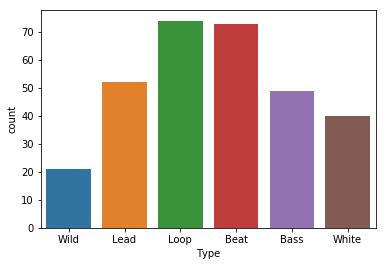

In [8]:
# plot bar of type
type_counts = songs['Type'].value_counts()
print(type_counts)

sns.countplot(x = 'Type', data=songs)

Most generally, type refers to the card's role in the song. For example, lead might be the vocals, loop might be the guitar line, beat might be the drum part, and bass might be the bass guitar line. This is based on prominence and job in the song - beat keeps the pace of the song, bass fills it out, etc. White type are effects (single sounds or short riffs that can be added in), while wild cards contain all 4 major parts (but the design of the board means you can never play more than two roles at a time).

In [9]:
# White for type are FX cards
songs[songs['Type'] == 'White'].head()

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
14,FX,Lift Your Voice,2,White,FX,Pop,S01,C014,9/24/17,Sweets,Gaming System,150,G Major,Kimberly Salt,Play an extra Vocals card
15,FX,Clear Your Mind,2,White,FX,Pop,S01,C015,9/24/17,Sweets,Gaming System,120,F Minor,Kimberly Salt,Clear 1 opponent card at random
29,FX,Flame Out,2,White,FX,Hip-Hop/Rap,S01,C029,9/24/17,Highness,Gaming System,120,E Minor,Kevin Hong,+1 point for each Blue card
30,FX,Roll Up,3,White,FX,Hip-Hop/Rap,S01,C030,9/24/17,Highness,Gaming System,110,A Minor,Kevin Hong,Draw 1 card
44,FX,Strings of Fate,2,White,FX,Rock,S01,C044,9/24/17,Blade,Gaming System,120,A Major,Vance Kelly,Play an extra Guitar card


In [13]:
# count of instruments (also list of instruments in the dataset)
instrument_count = songs['Instrument'].value_counts()
instrument_count

Drums       72
Guitar      54
Keys        52
Vocals      44
FX          40
Sampler     10
Horns        8
Strings      8
V/K/D/K      6
V/G/D/G      4
V/K/D/G      4
V/H/D/G      3
V/Sa/D/G     1
V/G/D/K      1
V/K/D/V      1
V/St/D/K     1
Name: Instrument, dtype: int64

In [16]:
songs[songs['Instrument'] == 'Sampler'] #print out all sampler songs

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
64,Candy Kettles,Dexting,1,Loop,Sampler,"Pop, Dance/Electronic",S01,C064,9/24/17,Derby,Playlist Pack,145,A Minor,Sean Mort,NaN
79,Bignums,Larry's Place (Part II),1,Loop,Sampler,Hip-Hop/Rap,S01,C079,9/24/17,Mirrors,Playlist Pack,150,E Minor,Jim Mazza,NaN
111,Crackcase,Somatic,2,Loop,Sampler,Dance/Electronic,S01,C111,9/24/17,Astro,Playlist Pack,150,F Minor,Bryan Olson,NaN
156,Joliet,Better Wake Up,2,Loop,Sampler,Hip-Hop/Rap,S01,C156,12/4/17,Bomb,Playlist Pack,140,E Minor,Matthew Eng,NaN
172,Lossage,Moon Lab,3,Loop,Sampler,Dance/Electronic,S01,C172,2018,Chiller,Playlist Pack,107,Gb Minor,Ryan Lesser,NaN
185,Winnage,The Night Porter,1,Loop,Sampler,"Dance/Electronic, R&B",S01,C185,9/24/17,Dapper,Discover Pack,129,G Minor,Jerod Barker,NaN
197,Righteous Palms Crew,Take U 4 A Ride,1,Lead,Sampler,"Pop, Dance/Electronic",S01,C197,9/24/17,Seer,Discover Pack,135,A Minor,Vance Kelly,NaN
227,Billzantium,Wishin' I Had It Now,1,Lead,Sampler,Dance/Electronic,S01,C227,9/24/17,Puff,Discover Pack,150,G Minor,Elio Moavero,NaN
273,Skrewbert,The Game Got You,2,Lead,Sampler,Dance/Electronic,S01,C273,1/16/18,Socket,Discover Pack,150,Gb Minor,Anne Szabla,NaN
305,Connecticut River Boys,Didgeridoo Stomp,3,Loop,Sampler,Country,S01,C305,2/1/18,Baffler,Playlist Pack,120,Bb Major,Anne Szabla,NaN


In [16]:
# cross tab of type and instrument
pd.crosstab(songs['Type'], songs['Instrument'])

Instrument,Drums,FX,Guitar,Horns,Keys,Sampler,Strings,V/G/D/G,V/G/D/K,V/H/D/G,V/K/D/G,V/K/D/K,V/K/D/V,V/Sa/D/G,V/St/D/K,Vocals
Type,,,,,,,,,,,,,,,,
Bass,0,0,28,1,17,0,3,0,0,0,0,0,0,0,0,0
Beat,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Lead,0,0,1,2,2,3,1,0,0,0,0,0,0,0,0,43
Loop,0,0,25,5,33,7,4,0,0,0,0,0,0,0,0,0
White,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Wild,0,0,0,0,0,0,0,4,1,3,4,6,1,1,1,0


There's some interesting info in the above cross tab of the intruments in each role (type). We'll graph this in a bit. First we need to think about the wild cards - the cards that can fill every main role (bass, beat, lead, and loop). As listed right now, they aren't useful, so we'll do some analysis with them excluded and think about the best way to bring them back in. Finally, the White cards are all FX cards, generally a single sound or pattern of sounds but not a part of a song. They also have a role in the VS mode of play. We won't exclude them for now, but recognize that they are unique.

In [19]:
# Creating a new dataframe that doesn't have the wild cards in it

# list of the wild card instrument strings
wildcard_inst = ['V/K/D/K', 'V/K/D/G', 'V/G/D/G', 'V/H/D/G', 'V/K/D/V', 'V/G/D/K', 'V/St/D/K', 'V/Sa/D/G']

# make a copy of the original dataframe (don't want to change the original)
songs_nowild = songs.copy()

# loop over the list of wild card instruments and replace with NaN
for option in wildcard_inst:
    songs_nowild.replace(str(option), np.nan, inplace=True)
    
# remove all the NaNs
songs_nowild = songs_nowild[songs_nowild['Instrument'].notnull()]
print(songs_nowild['Instrument'].value_counts())
songs_nowild.head()

Drums      72
Guitar     54
Keys       52
Vocals     44
FX         40
Sampler    10
Horns       8
Strings     8
Name: Instrument, dtype: int64


,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
2,Carly Rae Jepsen,Call Me Maybe,2,Lead,Vocals,Pop,S01,C002,9/24/17,Sweets,Gaming System,120,G Major,Sander Berg,NaN
3,Sia,Chandelier,3,Lead,Vocals,Pop,S01,C003,9/24/17,Sweets,Gaming System,87,Db Major,Lisk Feng,NaN
4,Ricky Martin,La Mordidita (Ft. Yotuel),1,Loop,Horns,"Latin, Pop",S01,C004,9/24/17,Sweets,Gaming System,142,E Minor,Gianna Ruggiero,NaN
5,The Lingala Sound,Crystal Beach,1,Loop,Keys,"Pop, Dance/Electronic",S01,C005,9/24/17,Sweets,Gaming System,110,E Minor,Leonard Peng,NaN
6,Sia,Chandelier,2,Loop,Keys,Pop,S01,C006,9/24/17,Sweets,Gaming System,87,Db Major,Lisk Feng,NaN


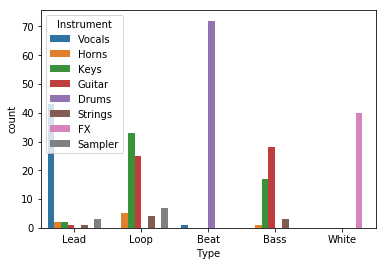

In [20]:
# graph the distribution of instruments by type/role
sns.countplot(x = 'Type', data=songs_nowild, hue='Instrument')

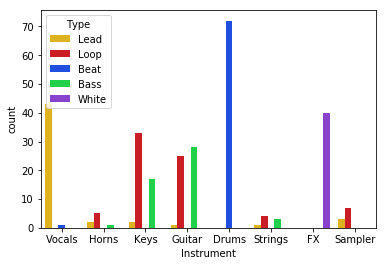

In [31]:
bright=["#003FFF", "#03ED3A", "#E8000B", "#8A2BE2", "#FFC400", "#00D7FF"]
type_colors = {'Lead': bright[4], 'Loop': bright[2], 'Beat': bright[0], 'Bass': bright[1], 'White': bright[3]}
sns.countplot(x = 'Instrument', data=songs_nowild, hue='Type', palette = type_colors)

In [54]:
pd.crosstab(songs_sanswild['Instrument'], songs_sanswild['Type'])

Type,Bass,Beat,Lead,Loop,White
Instrument,,,,,
Drums,0,72,0,0,0
FX,0,0,0,0,40
Guitar,28,0,1,25,0
Horns,1,0,2,5,0
Keys,17,0,2,33,0
Sampler,0,0,3,7,0
Strings,3,0,1,4,0
Vocals,0,1,43,0,0


In [55]:
print("Percent of each Instrument ")
pd.crosstab(songs_sanswild['Instrument'], songs_sanswild['Type']).apply(lambda r: round((r/r.sum())*100, 1), axis=0)

Percent of each Instrument 


Type,Bass,Beat,Lead,Loop,White
Instrument,,,,,
Drums,0.0,98.6,0.0,0.0,0.0
FX,0.0,0.0,0.0,0.0,100.0
Guitar,57.1,0.0,1.9,33.8,0.0
Horns,2.0,0.0,3.8,6.8,0.0
Keys,34.7,0.0,3.8,44.6,0.0
Sampler,0.0,0.0,5.8,9.5,0.0
Strings,6.1,0.0,1.9,5.4,0.0
Vocals,0.0,1.4,82.7,0.0,0.0


In [60]:
key_counts = songs['Key'].value_counts()
key_counts

n/a         78
E Minor     36
A Minor     23
D Minor     15
F Minor     15
G Minor     13
Eb Minor    13
B Minor     11
C Minor     10
A Major      9
E Major      9
Db Major     9
Gb Major     9
C Major      8
G Major      8
Bb Minor     8
Gb Minor     7
Ab Minor     7
Eb Major     6
D Major      4
Ab Major     4
B Major      3
Db Minor     2
?            2
Name: Key, dtype: int64

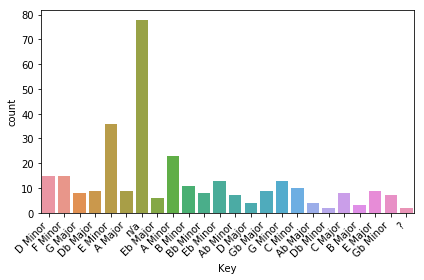

In [64]:
ax = sns.countplot(x='Key', data=songs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [95]:
# So drums and some effects are key-less (makes sense)
songs[songs['Key']=='n/a'].head()

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
8,Freda Turner,Hard Light,1,Beat,Drums,"Pop, Dance/Electronic",S01,C008,9/24/17,Sweets,Gaming System,128.0,n/a,David Medel,NaN
9,The Lingala Sound,Crystal Beach,1,Beat,Drums,"Pop, Dance/Electronic",S01,C009,9/24/17,Sweets,Gaming System,110.0,n/a,Leonard Peng,NaN
10,CHVRCHES,The Mother We Share,2,Beat,Drums,Dance/Electronic,S01,C010,9/24/17,Sweets,Gaming System,87.0,n/a,Alison Polston,NaN
11,Ricky Martin,La Mordidita (Ft. Yotuel),3,Beat,Drums,"Latin, Pop",S01,C011,9/24/17,Sweets,Gaming System,142.0,n/a,Gianna Ruggiero,NaN
23,Bullwheel,Atomic Handbrake,1,Beat,Drums,Hip-Hop/Rap,S01,C023,9/24/17,Highness,Gaming System,129.0,n/a,Lokhaan,NaN


In [34]:
# Major or Minor?
songs = songs.assign(Major = pd.Series(songs['Key']).str.endswith('Major'))
songs = songs.assign(Minor = pd.Series(songs['Key']).str.endswith('Minor'))
songs.head()

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect,Major,Minor
0,The Transformers,Main Title Song,2,Wild,V/K/D/K,"Soundtrack, Dance/Electronic",P01,C001,9/1/17,DM,Promo,85,D Minor,Shawn Kenney,NaN,False,True
1,Bruno Mars,24K Magic,2,Wild,V/K/D/K,"Pop, R&B",S01,C001,9/24/17,Sweets,Gaming System,107,F Minor,Dan Stiles,NaN,False,True
2,Carly Rae Jepsen,Call Me Maybe,2,Lead,Vocals,Pop,S01,C002,9/24/17,Sweets,Gaming System,120,G Major,Sander Berg,NaN,True,False
3,Sia,Chandelier,3,Lead,Vocals,Pop,S01,C003,9/24/17,Sweets,Gaming System,87,Db Major,Lisk Feng,NaN,True,False
4,Ricky Martin,La Mordidita (Ft. Yotuel),1,Loop,Horns,"Latin, Pop",S01,C004,9/24/17,Sweets,Gaming System,142,E Minor,Gianna Ruggiero,NaN,False,True


In [117]:
major_count = songs['Major'].value_counts()
minor_count = songs['Minor'].value_counts()
print('Count of Major Keys:\n', major_count)
print('Count of Minor Keys:\n', minor_count)
pd.crosstab(songs['Major'], songs['Minor'])

Count of Major Keys:
 False    238
True      69
Name: Major, dtype: int64
Count of Minor Keys:
 True     160
False    147
Name: Minor, dtype: int64


Minor,False,True
Major,,
False,78,160
True,69,0


In [66]:
sns.distplot?

In [67]:
songs['BPM'].value_counts()

128    29
120    28
150    21
130    15
95     13
87     10
110     9
104     9
140     8
118     8
122     8
80      8
102     7
145     7
132     7
96      7
105     6
125     6
115     5
88      5
137     5
97      5
129     5
142     4
107     4
108     4
112     4
114     4
134     4
98      4
82      4
93      4
116     4
124     4
121     3
100     3
94      3
90      3
135     3
99      2
139     2
143     2
?       2
103     1
131     1
85      1
117     1
144     1
106     1
111     1
109     1
126     1
123     1
148     1
Name: BPM, dtype: int64

In [88]:
#https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas
songs['BPM'].replace('?', np.nan, inplace=True)
songs = songs[songs['BPM'].notnull()]
songs[['BPM']] = songs[['BPM']].apply(pd.to_numeric, errors='coerce')
songs.head()

/Users/kathrynclark/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
0,The Transformers,Main Title Song,2,Wild,V/K/D/K,"Soundtrack, Dance/Electronic",P01,C001,9/1/17,DM,Promo,85.0,D Minor,Shawn Kenney,NaN
1,Bruno Mars,24K Magic,2,Wild,V/K/D/K,"Pop, R&B",S01,C001,9/24/17,Sweets,Gaming System,107.0,F Minor,Dan Stiles,NaN
2,Carly Rae Jepsen,Call Me Maybe,2,Lead,Vocals,Pop,S01,C002,9/24/17,Sweets,Gaming System,120.0,G Major,Sander Berg,NaN
3,Sia,Chandelier,3,Lead,Vocals,Pop,S01,C003,9/24/17,Sweets,Gaming System,87.0,Db Major,Lisk Feng,NaN
4,Ricky Martin,La Mordidita (Ft. Yotuel),1,Loop,Horns,"Latin, Pop",S01,C004,9/24/17,Sweets,Gaming System,142.0,E Minor,Gianna Ruggiero,NaN


In [89]:
songs.describe()

,Lvl,BPM
count,307.000000,307.000000
mean,2.039088,117.338762
std,0.757384,18.884822
min,1.000000,80.000000
25%,1.000000,102.000000
50%,2.000000,120.000000
75%,3.000000,130.000000
max,3.000000,150.000000


In [99]:
songs

,Artist,Title,Lvl,Type,Instrument,Style,Season,Card #,Release,Playlist,Source,BPM,Key,Illustrator,Effect
0,The Transformers,Main Title Song,2,Wild,V/K/D/K,"Soundtrack, Dance/Electronic",P01,C001,9/1/17,DM,Promo,85.0,D Minor,Shawn Kenney,NaN
1,Bruno Mars,24K Magic,2,Wild,V/K/D/K,"Pop, R&B",S01,C001,9/24/17,Sweets,Gaming System,107.0,F Minor,Dan Stiles,NaN
2,Carly Rae Jepsen,Call Me Maybe,2,Lead,Vocals,Pop,S01,C002,9/24/17,Sweets,Gaming System,120.0,G Major,Sander Berg,NaN
3,Sia,Chandelier,3,Lead,Vocals,Pop,S01,C003,9/24/17,Sweets,Gaming System,87.0,Db Major,Lisk Feng,NaN
4,Ricky Martin,La Mordidita (Ft. Yotuel),1,Loop,Horns,"Latin, Pop",S01,C004,9/24/17,Sweets,Gaming System,142.0,E Minor,Gianna Ruggiero,NaN
5,The Lingala Sound,Crystal Beach,1,Loop,Keys,"Pop, Dance/Electronic",S01,C005,9/24/17,Sweets,Gaming System,110.0,E Minor,Leonard Peng,NaN
6,Sia,Chandelier,2,Loop,Keys,Pop,S01,C006,9/24/17,Sweets,Gaming System,87.0,Db Major,Lisk Feng,NaN
7,Megan Trainor,All About That Bass,3,Loop,Guitar,"Pop, R&B",S01,C007,9/24/17,Sweets,Gaming System,134.0,A Major,Gianna Ruggiero,NaN
8,Freda Turner,Hard Light,1,Beat,Drums,"Pop, Dance/Electronic",S01,C008,9/24/17,Sweets,Gaming System,128.0,n/a,David Medel,NaN
9,The Lingala Sound,Crystal Beach,1,Beat,Drums,"Pop, Dance/Electronic",S01,C009,9/24/17,Sweets,Gaming System,110.0,n/a,Leonard Peng,NaN


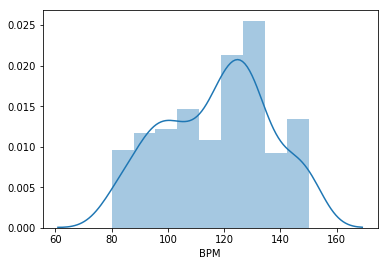

In [91]:
sns.distplot(songs['BPM'], hist=True)

In [93]:
songs.dtypes

Artist          object
Title           object
Lvl              int64
Type            object
Instrument      object
Style           object
Season          object
Card #          object
Release         object
Playlist        object
Source          object
BPM            float64
Key             object
Illustrator     object
Effect          object
dtype: object

2    131
3     94
1     82
Name: Lvl, dtype: int64


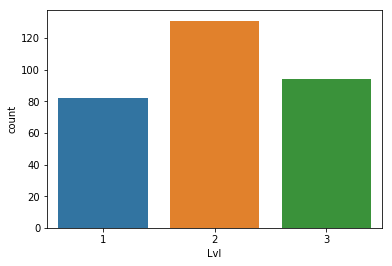

In [120]:
#breakdown by card level (1, 2, or 3)
lvl_counts = songs['Lvl'].value_counts()
print(lvl_counts)

sns.countplot(x = 'Lvl', data=songs)

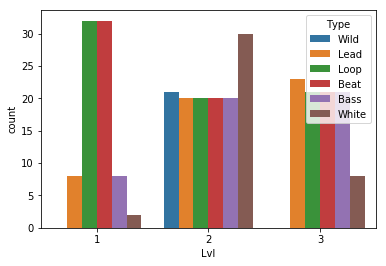

In [122]:
# what does the breakdown by level and type look like?
sns.countplot(x = 'Lvl', hue = 'Type', data=songs)

The above graph is interesting. Level 1 cards are an extreme version of the type breakdown (i.e. loop and beat are overrepresented in this dataset and the level 1 cards show this distribution to the extreme). But Level 2 and 3 cards have roughly the same numbers of the different types (excepting wild cards that are all level 2 and FX cards that seem to be their own thing).

In [123]:
songs = songs.assign(key_broad = 'Major' if songs['Major'] == True)

SyntaxError: invalid syntax (<ipython-input-123-2d6d51aed448>, line 1)

In [125]:
game_songs = songs[songs['Source'] == 'Gaming System']
game_songs.describe()

,Lvl,BPM
count,60.000000,60.000000
mean,2.016667,115.433333
std,0.747689,17.227655
min,1.000000,80.000000
25%,1.000000,103.500000
50%,2.000000,120.000000
75%,3.000000,128.000000
max,3.000000,150.000000


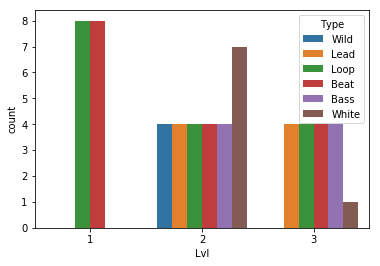

In [126]:
sns.countplot(x = 'Lvl', data = game_songs, hue = 'Type')

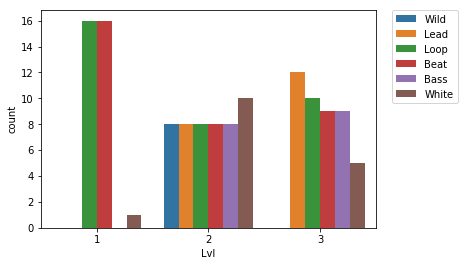

In [39]:
sns.countplot(x = 'Lvl', data = songs[songs['Source']=='Playlist Pack'], hue = 'Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

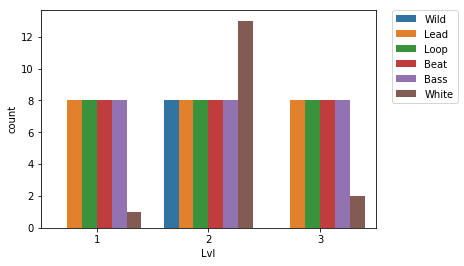

In [38]:
sns.countplot(x = 'Lvl', data = songs[songs['Source']=='Discover Pack'], hue = 'Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

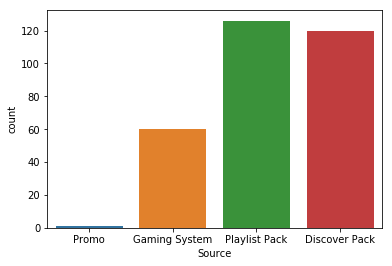

In [127]:
sns.countplot(x = 'Source', data = songs)

In [128]:
songs.describe()

,Lvl,BPM
count,307.000000,307.000000
mean,2.039088,117.338762
std,0.757384,18.884822
min,1.000000,80.000000
25%,1.000000,102.000000
50%,2.000000,120.000000
75%,3.000000,130.000000
max,3.000000,150.000000


In [32]:
# set IPython to show all output where variable or statement on own line (rather than just last one)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [35]:
major_count = songs['Major'].value_counts()
minor_count = songs['Minor'].value_counts()
major_count
minor_count
pd.crosstab(songs['Major'], songs['Minor'])

False    240
True      69
Name: Major, dtype: int64

True     160
False    149
Name: Minor, dtype: int64

Minor,False,True
Major,,
False,80,160
True,69,0
